In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("white")
sns.set_context("talk")
sns.set_palette("husl")

In [10]:
df_ai = pd.read_csv("./ai_time.csv", skiprows=2)
df_ai.head()

,Month,artificial intelligence: (Worldwide)
0,2010-10,40
1,2010-11,34
2,2010-12,30
3,2011-01,30
4,2011-02,35


In [11]:
path = "./"
files_ = os.listdir(path=path)
files = [f for f in files_ if f.endswith("_time.csv")]
files

['ai_time.csv',
 'bigdata_time.csv',
 'da_time.csv',
 'de_time.csv',
 'dl_time.csv',
 'ds_time.csv']

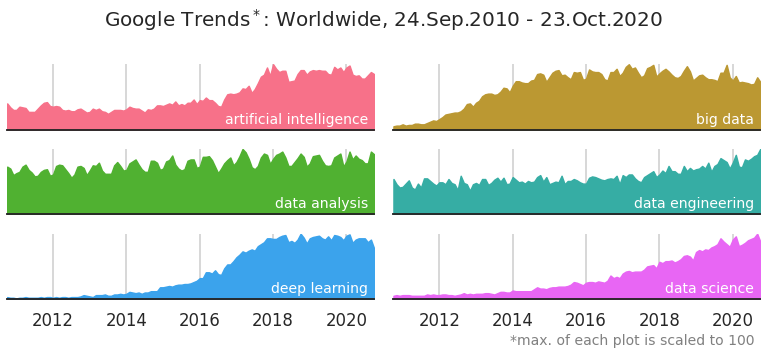

In [112]:
nfiles = len(files)
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(11, 5), 
                        sharex=True, sharey=True) #, gridspec_kw={"hspace":0.1, "wspace":0.05})
axs = axes.ravel()

dfs = {}
for i, (ax, file) in enumerate(zip(axs, files)):
    dfs[file] = pd.read_csv(os.path.join(path, file), skiprows=2)
    dfs[file]["year"] = dfs[file]["Month"].apply(lambda s: s.split("-")[0])
    cols = dfs[file].columns
    cols_clear = cols[1].split(":")[0]
    dfs[file].rename(columns={cols[1]: cols_clear}, inplace=True)
    region = cols[1].split(": ")[1][1:-1]
    
    df_idx = dfs[file].reset_index().groupby("year").nth(0)["index"].values
    
    ax.fill_between(dfs[file].index, 0, dfs[file][cols_clear], color=f"C{i}") #, color="lightsteelblue")
    ax.annotate(cols_clear, (dfs[file].shape[0]-3, 10), ha="right", color="w", fontsize=14)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(0, dfs[file].shape[0]-1)
    ax.set_ylim(0, 100)
    ax.set_yticks([])
    ax.grid()
    
    if i > 3:
        ax.set_xticks(df_idx[::2][1:])
        ax.set_xticklabels(dfs[file]["year"].loc[df_idx].values[::2][1:])

axs[5].text(dfs[file].shape[0]-3, -70, "*max. of each plot is scaled to 100", 
            ha="right", c="gray", fontsize=14)
fig.suptitle("Google Trends$^*$:" + f" {region}, 24.Sep.2010 - 23.Oct.2020", fontsize=20)
fig.tight_layout(rect=[0,-0.05,1,1])
fig.savefig("40_gt_2.png")

In [13]:
libs = ["numpy", "keras", "pandas", "tensorflow", "sklearn", "pytorch"]
libs_time = [l+".csv" for l in libs]
libs_map = [l+"_map.csv" for l in libs]

In [113]:
libs_time

['numpy.csv',
 'keras.csv',
 'pandas.csv',
 'tensorflow.csv',
 'sklearn.csv',
 'pytorch.csv']

In [14]:
libs_map

['numpy_map.csv',
 'keras_map.csv',
 'pandas_map.csv',
 'tensorflow_map.csv',
 'sklearn_map.csv',
 'pytorch_map.csv']

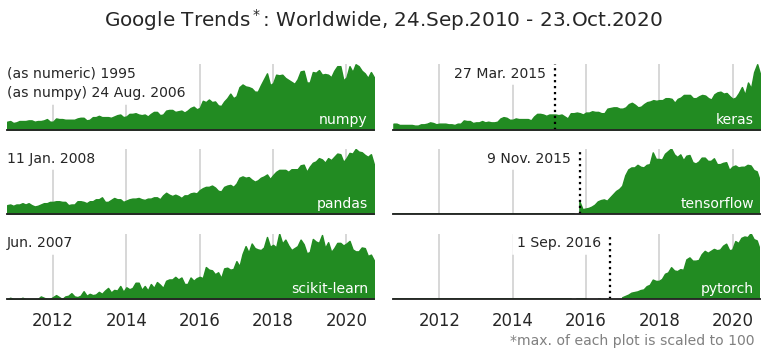

In [18]:
nfiles = len(files)
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(11, 5), 
                        sharex=True, sharey=True) #, gridspec_kw={"hspace":0.1, "wspace":0.05})
axs = axes.ravel()

dfs = {}
for i, (ax, file) in enumerate(zip(axs, libs_time)):
    dfs[file] = pd.read_csv(os.path.join(path, file), skiprows=2, na_values="<1")
    dfs[file]["year"] = dfs[file]["Month"].apply(lambda s: s.split("-")[0])
    cols = dfs[file].columns
    cols_clear = cols[1].split(":")[0]
    dfs[file].rename(columns={cols[1]: cols_clear}, inplace=True)
    region = cols[1].split(": ")[1][1:-1]
    
    df_idx = dfs[file].reset_index().groupby("year").nth(0)["index"].values
    
    ax.fill_between(dfs[file].index, 0, dfs[file][cols_clear], color="forestgreen")
    ax.annotate(cols_clear, (dfs[file].shape[0]-3, 10), ha="right", color="w", fontsize=14)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(0, dfs[file].shape[0]-1)
    ax.set_ylim(0, 100)
    ax.set_yticks([])
    ax.grid()
    
    if i > 3:
        ax.set_xticks(df_idx[::2][1:])
        ax.set_xticklabels(dfs[file]["year"].loc[df_idx].values[::2][1:])

axs[0].annotate("(as numeric) 1995", (0, 80),ha="left", fontsize=14, backgroundcolor="w")
axs[0].annotate("(as numpy) 24 Aug. 2006 ", (0, 50),ha="left", fontsize=14, backgroundcolor="w")        
        
axs[1].axvline(53, c="k", linestyle=":")
axs[1].annotate("27 Mar. 2015", (53-3, 80),ha="right", fontsize=14, backgroundcolor="w")

axs[2].annotate("11 Jan. 2008 ", (0, 80),ha="left", fontsize=14, backgroundcolor="w")        

axs[3].axvline(61, c="k", linestyle=":")
axs[3].annotate("9 Nov. 2015", (61-3, 80),ha="right", fontsize=14, backgroundcolor="w")

axs[4].annotate("Jun. 2007 ", (0, 80),ha="left", fontsize=14, backgroundcolor="w")        

axs[5].axvline(71, c="k", linestyle=":")
axs[5].annotate("1 Sep. 2016", (71-3, 80),ha="right", fontsize=14, backgroundcolor="w")


axs[5].text(dfs[file].shape[0]-3, -70, "*max. of each plot is scaled to 100", 
            ha="right", c="gray", fontsize=14)
fig.suptitle("Google Trends$^*$:" + f" {region}, 24.Sep.2010 - 23.Oct.2020", fontsize=20)
fig.tight_layout(rect=[0,-0.05,1,1])
fig.savefig("40_gt_3.png")

In [260]:
dfs["keras.csv"].loc[61]

Month    2015-11
keras         25
year        2015
Name: 61, dtype: object

In [22]:
libs_map

['numpy_map.csv',
 'keras_map.csv',
 'pandas_map.csv',
 'tensorflow_map.csv',
 'sklearn_map.csv',
 'pytorch_map.csv']

In [24]:
dfs_map = {}
df_map_merge = 0
for l in libs_map:
    dfs_map[l] = pd.read_csv(l, skiprows=2, na_values="<1")
    dfs_cols = dfs_map[l].columns
    cols_clear = f"{l.split('_')[0]}"
    
    dfs_map[l] = dfs_map[l].rename(columns={dfs_cols[1]:cols_clear}).dropna().sort_values(by=cols_clear, ascending=False).reset_index().rename(columns={"index":f"{cols_clear}_order"})
    dfs_map[l][f"{cols_clear}_order"] = dfs_map[l].index
    dfs_map[l] = dfs_map[l][["Country", cols_clear, f"{cols_clear}_order"]]
    
    if l == libs_map[0]:
        df_map_merge = dfs_map[l]
    else:
        df_map_merge = pd.merge(df_map_merge, dfs_map[l], how="outer")
    
df_map_merge.head()

,Country,numpy,numpy_order,keras,keras_order,pandas,pandas_order,tensorflow,tensorflow_order,sklearn,sklearn_order,pytorch,pytorch_order
0,China,100.0,0.0,5.0,4.0,29.0,9.0,100.0,0.0,100.0,0.0,100.0,0.0
1,South Korea,98.0,1.0,7.0,2.0,30.0,8.0,86.0,1.0,88.0,1.0,76.0,1.0
2,St. Helena,94.0,2.0,NaN,NaN,100.0,0.0,35.0,2.0,51.0,2.0,29.0,4.0
3,Switzerland,70.0,3.0,2.0,7.0,24.0,13.0,15.0,7.0,22.0,8.0,13.0,7.0
4,Singapore,65.0,4.0,6.0,3.0,47.0,1.0,33.0,3.0,40.0,6.0,31.0,3.0


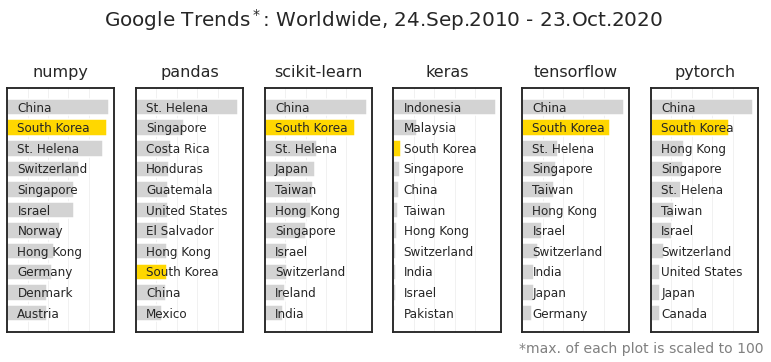

In [109]:
fig, axs = plt.subplots(ncols=6, figsize=(11, 5))

libs_map_ = ["numpy", "pandas", "sklearn", "keras", "tensorflow", "pytorch"]

for ax, l  in zip(axs, libs_map_):
    lib = l.split("_")[0]
    shares = dfs_map[l+'_map.csv'].loc[:10, lib]
    countries = dfs_map[l+'_map.csv'].loc[:10, "Country"]
    ax.barh(countries, shares, fc="lightgray")
    ax.set_yticklabels([])
    ax.invert_yaxis()
    ax.set_xticks(list(range(0, 100, 20)))
    ax.set_xticklabels([])
    ax.grid(axis="x", c="lightgray", lw=1, alpha=0.3)
    
    if l == "sklearn":
        title = "scikit-learn"
    else:
        title = l
    
    ax.set_title(title, fontsize=16, pad=12)
    
    idx_korea = np.where("South Korea" == countries.values)[0]
    if len(idx_korea) > 0:
        ax.patches[idx_korea[0]].set_facecolor("gold")
    
    for i, country in enumerate(countries):
        ax.annotate(country, (10, i), va="center", fontsize=12)

fig.text(0.98, 0.02, "*max. of each plot is scaled to 100", 
            ha="right", c="gray", fontsize=14)
# axs[5].annotate("*max. of each plot is scaled to 100", (0, 0), fontsize=14)
fig.suptitle("Google Trends$^*$:" + f" {region}, 24.Sep.2010 - 23.Oct.2020", fontsize=20)
fig.tight_layout(rect=[0,0.02,1,1])
fig.savefig("40_gt_4.png")